<center><h1> Visualization With Seaborn  </h1></center>

- Seaborn is a Python data visualization library based on matplotlib.
- It provides a high-level interface for drawing attractive and informative statistical graphics. It provide choices for plot style and color defaults, defines simple high-level functions for common statistical plot types, and integrates with the functionality provided by Pandas DataFrames.
- The main idea of Seaborn is that it provides high-level commands to create a variety of plot types useful for statistical data exploration, and even some statistical model fitting.

### Table of Contents

1. Creating basic plots
    - Line chart
    - Bar Chart
    - Histogram
    - Box plot
    - Violin plot
    - Scatter plot
    - Hue semantic
    - Bubble plot
    - Pie Chart
2. Advance Categorical plots in Seaborn
3. Density plots
4. Pair plots

In [1]:
# importing required libraries
import seaborn as sns
sns.set()
sns.set(style='darkgrid')

import numpy as np
import pandas as pd

#importing matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize']=(10,10)

In this notebook we will use the Big Mart Sales Data. You can download the data from github: https://github.com/Yuke217

In [3]:
# read the dataset
df = pd.read_csv("dataset/bigmart_data.csv")
# drop the null values
df = df.dropna(how="any")
# View the top results
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088


### Creating basic plots
Let's have a look on how can you create some basic plots in seaborn in a single line for which multiple lines were required in matplotlib.

#### Line Chart

* With some datasets, you may want to understand changes in one variable as a function of time, or a similarly continuous variable.
* In seaborn, this can be accomplished by the **lineplot()** function, ither directly or with **relplot** by setting **kind="line":**

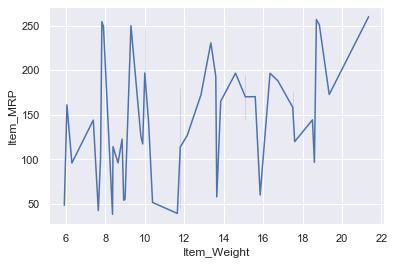

In [6]:
# line plot using lineplot()
sns.lineplot(x="Item_Weight", y="Item_MRP",data=df[:50])

#### Bar chart

- In seaborn, you can create a barchart by simply using the **barplot** function.
- Notice that to achieve the same thing in matplotlib, we had to write extra code just to group the data category wise.
- And then we had to write much more code to make sure that the plot comes out correct.

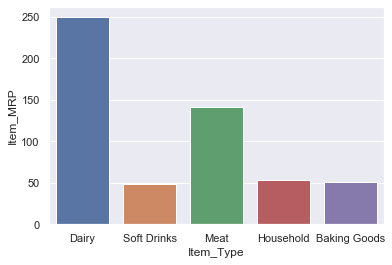

In [8]:
sns.barplot(x="Item_Type", y="Item_MRP", data=df[:5])

#### Histogram
- You can create a histogram in seaborn by using **distplot()**. 

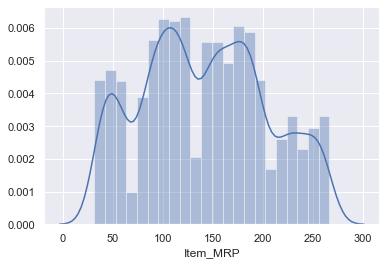

In [9]:
sns.distplot(df['Item_MRP'])

#### Box plots

- You can use **Boxplot()** for creating boxplots in seaborn
- Let's try to visualize the distribution of Item_Outlet_Sales of items.

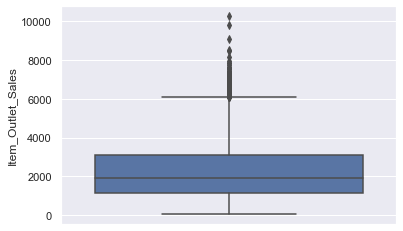

In [11]:
sns.boxplot(df['Item_Outlet_Sales'], orient='vertical')

#### Violin plot

- A violin plot plays similar role as a box and whisker plot.
- It shows the distribution of quantitative data across several levels of one(or more) categorical variables such that those distributions can be compared.
- Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.
- You can create a violinplot using the **violinplot()** in seaborn

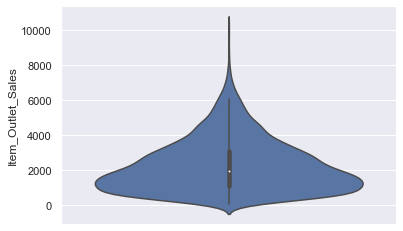

In [12]:
sns.violinplot(df['Item_Outlet_Sales'], orient='vertical')

#### Scatter plot
- It dipicts the relationship between two variables using a cloud of points, where each point repesents an observation in the dataset.
- You can use **relplot()** with the option of kind=scatter to plot a scatter plot in seaborn. 
- Notice the default option is scatter

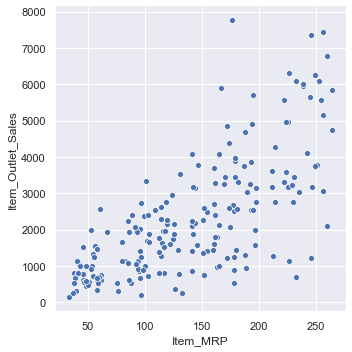

In [15]:
# scatter plot
sns.relplot(x="Item_MRP", y="Item_Outlet_Sales", data = df[:200], kind="scatter")

#### Hue semantic 

We can also add another dimension to the plot by coloring the points according to a third variable. In seaborn, this is refered to as using a "Hue semantic".

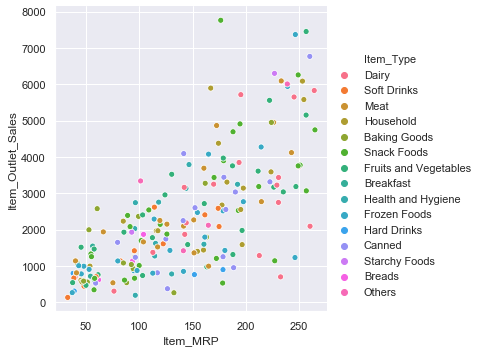

In [18]:
sns.relplot(x="Item_MRP", y="Item_Outlet_Sales", hue="Item_Type", data=df[:200])

- Remember the line chart that we created earlier> When we have **hue** semantic, we can create more complex line plots in seaborn.
- In the following example, **different line plots for different categories of Outlet_Size** are made

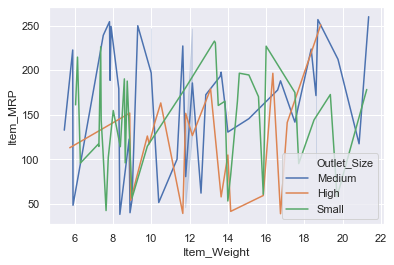

In [20]:
# different line plots for different categories of the Outlet_Size
sns.lineplot(x="Item_Weight", y="Item_MRP", hue="Outlet_Size", data=df[:100])

#### Bubble plot
- We utilize the **hue** semantic to color bubbles by their Item_Visibility and at the ssame time use it as size of individual bubbles.

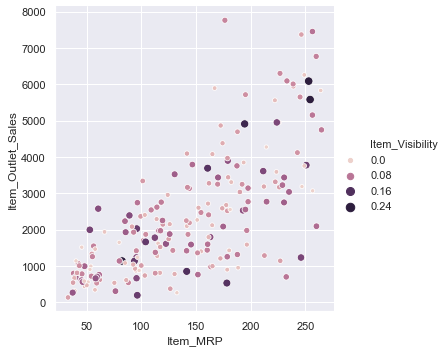

In [25]:
# bubble plot
sns.relplot(x="Item_MRP", y="Item_Outlet_Sales", data=df[:200],kind="scatter", size="Item_Visibility", hue="Item_Visibility")

#### Category wise sub plot
- You can also create **plots based on category** in seaborn.
- We have created scatter plots for each Outlet_Size
- Now we create three plots based on different Outlet_Size using **col**.

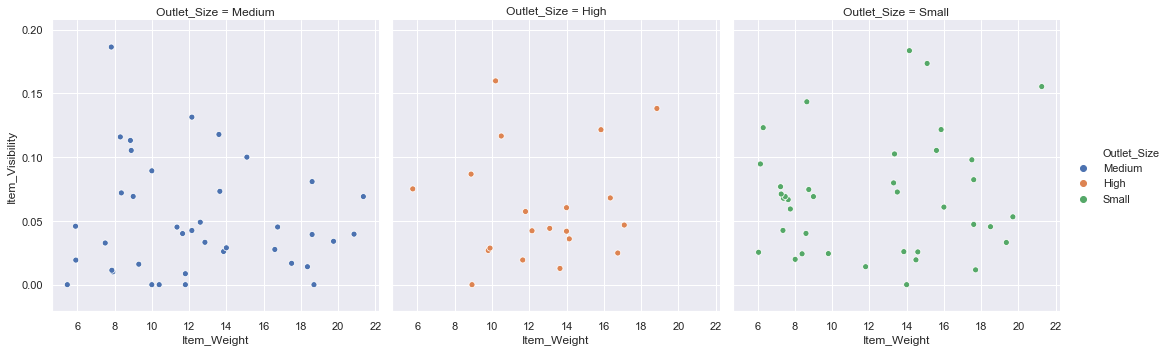

In [29]:
# subplots for each of the category of Outlet_Size
sns.relplot(x="Item_Weight", y="Item_Visibility", hue= 'Outlet_Size',col ="Outlet_Size",data=df[:100] )

## 2. Advance categorical plots in seaborn

For categorical variables we have three different families in seaborn.

- **Categorical scatterplots:**
 
 - stripplot() (with kind="strip"; the default)
 - swarmplot() (with kind="swarm")

- **Categorical distribution plots:**

 - boxplot() (with kind="box")
 - violinplot() (with kind="violin")
 - Boxenplot() (with kind="bowen")

- **Categorical estimate plots:**

 - pointplot() (with kind="point")
 - barplot() (with kind="bar")

**The default representation of the data in catplot() uses a scatterplot.**

### a. Categorical scatterplots

#### Strip plot
- Draws a scatterplot where one variable is categorical.
- You can create this by passing **kind=strip** in the `catplot`.

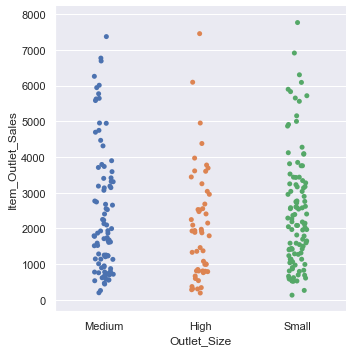

In [30]:
sns.catplot(x="Outlet_Size", y="Item_Outlet_Sales", kind="strip", data=df[:250])

#### Swarm plot

- This function is similar to `stripplot()`, but the points are adjusted so that they don't overlap.
- This gives a better representation of the distribution of values, but it does not scale well to large numbers of observations. This style of plot is sometimes called a "beeswarm".
- You can created this by passing **kind=swarm** in the `catplot`.

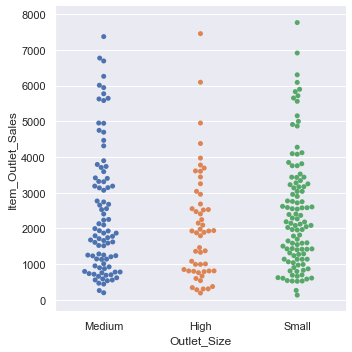

In [31]:
sns.catplot(x="Outlet_Size", y="Item_Outlet_Sales", kind='swarm',data=df[:250])

### b. Categorical distribution plots

#### Box Plots

- Box plot shows the three quartile values of the distribution along with the extreme values.
- The "whiskers" extend to points that lie within 1.5 IQRs of the lower and upper quartile, and then observations that fall ourside this range are displayed independently.
- This means that each value in the boxplot corresponds to an actual observation in the data.

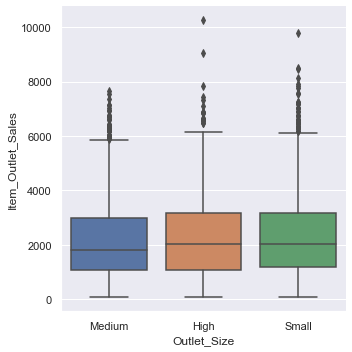

In [32]:
sns.catplot(x="Outlet_Size", y="Item_Outlet_Sales", kind="box", data=df)

#### Violin Plots

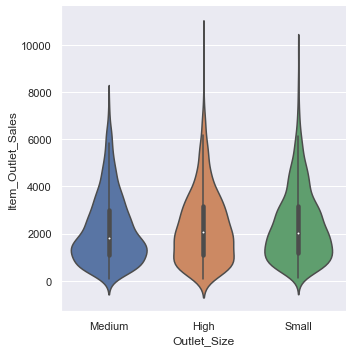

In [33]:
sns.catplot(x="Outlet_Size", y="Item_Outlet_Sales", kind="violin",data=df)

#### Boxen plots
- This style of plot was originally named a "letter value" plot because it shows a large number of quantiles that are defined as "letter values".
- It is similarto a box plot in plotting a nonparametric representation of a distribution in which all features correspond to actual observations.
- By plotting more quantiles, it provides more information about the shape of the distribution, particularly in the tails.

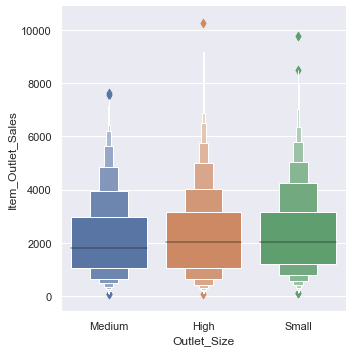

In [34]:
sns.catplot(x="Outlet_Size", y="Item_Outlet_Sales", kind="boxen",data=df)

#### Point plot

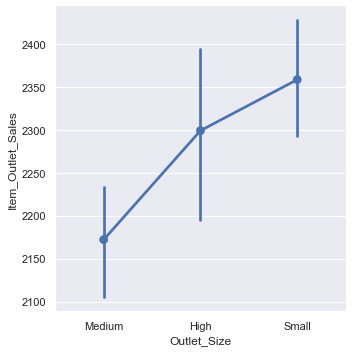

In [35]:
sns.catplot(x="Outlet_Size", y="Item_Outlet_Sales",kind="point",data=df)

#### Bar plots

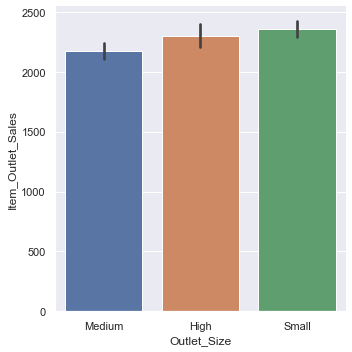

In [36]:
sns.catplot(x="Outlet_Size", y="Item_Outlet_Sales", kind="bar",data=df)

## 3. Density Plots

***Rather than a histogram, we can get a smooth estimate of the distribution using a kernel density estimation, which Seaborn does with sns.dkeplot:***

- A Density Plot visualises the distribution of data over a continuous interval or time period. 
- Density plot allows for smoother distribution by smoothing out noise. The peaks of a Density Plot help display where values are concentrated over the interval.
- An advantage Density Plots have over Histograms is that they're better at determining the distribution shape because they're not affected by the number of bins used (each bar used in a typical histogram).

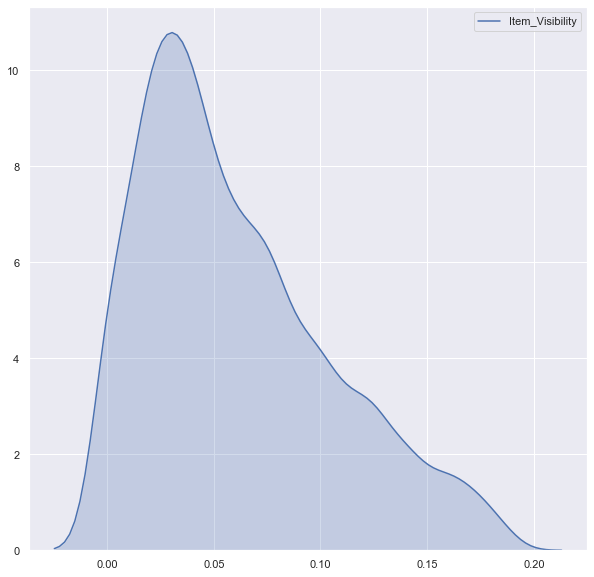

In [38]:
# distribution of Item Visibility
plt.figure(figsize=(10,10))
sns.kdeplot(df["Item_Visibility"],shade=True)

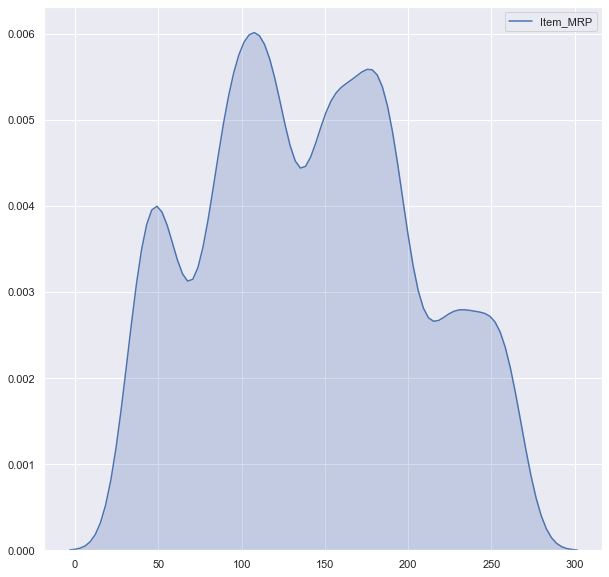

In [39]:
# distribution of Item MRP
plt.figure(figsize=(10,10))
sns.kdeplot(df["Item_MRP"],shade=True)

### Histogram and Density Plot

***Histograms and KDE can be combined using distplot:***

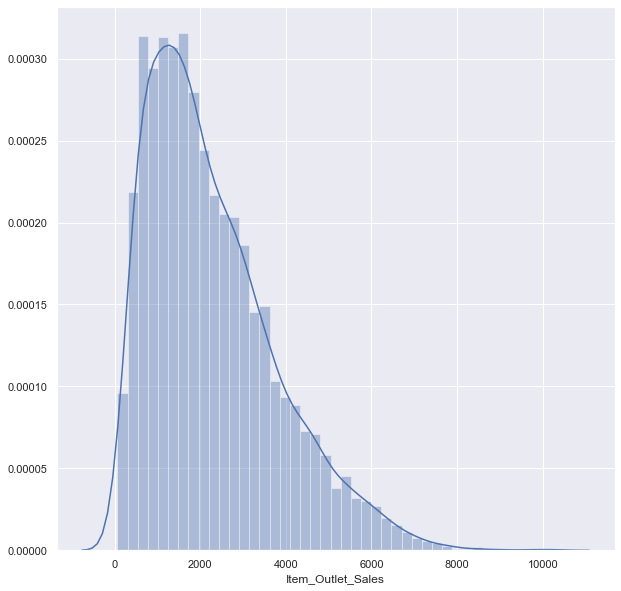

In [41]:
plt.figure(figsize=(10,10))
sns.distplot(df['Item_Outlet_Sales'])

## 4. Pair plots

- When you generalize joint plots to datasets of larger dimentions, you end up with pair plots. This is very useful for exploring correlations between multidimensional data, when you'd like to plot all pairs of values against each other.

- We'll demo this with the well-known Iris dataset, which lists measurements of petals and sepals of three iris species:

In [42]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


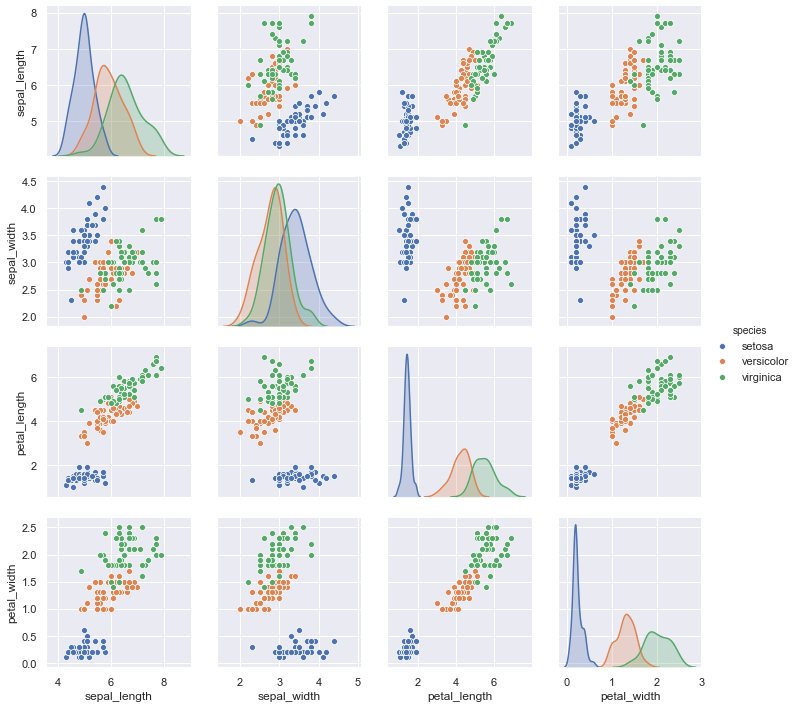

In [43]:
sns.pairplot(iris,hue='species',height=2.5)